Will Geary

willcgeary@gmail.com

# Part 1 - CSV Test

To Do: Write a script to transform input CSV to desired output CSV. 

*You will find a CSV file available for download here: [test.csv](https://s3.amazonaws.com/data-code-test/test.csv). There are two steps (plus an optional bonus) to this part of the test. Each step concerns manipulating the values for a single field according to the step's requirements. The steps are as follows:*

### String cleaning
*The bio field contains text with arbitrary padding, spacing and line breaks. Normalize these values to a space-delimited string.*

In [1]:
import pandas as pd # pandas library
import re # regular expressions

Read the csv into a pandas dataframe.

In [2]:
df = pd.read_csv('https://s3.amazonaws.com/data-code-test/test.csv')
df.head(2)

,name,gender,birthdate,address,city,state,zipcode,email,bio,job,start_date
0,Nathalia Moore DDS,M,2006-01-24,04078 Maximilian Brooks Suite 319,Montgomeryland,LA,63077,leeann.hermann@yahoo.com,Autem vero aliquid repellendus illo distinctio...,Tax inspector,12/31/1991
1,Mrs. Ottilie Grady,F,1972-03-01,6378 Gerhold Glens Suite 234,New Conortown,MA,19394,sunday99@schummgreenfelder.com,Culpa possimus laudantium earum ducimus dolori...,"Merchandiser, retail",10/84


In [3]:
print "The data frame is", df.shape[0], "rows and", df.shape[1], "columns."

The data frame is 500 rows and 11 columns.


In [4]:
bios = df['bio'].copy()

This what the first and sixth bio looks like:

In [5]:
bios[0]

'Autem vero aliquid repellendus illo distinctio. Reiciendis excepturi aut ducimus sint dignissimos et. Similique sunt et ullam sit.\n\t'

In [6]:
bios[5]

'Dolorem suscipit voluptas consequatur autem.          Fugiat ut nostrum occaecati quia.\n Quam sint ad tempora mollitia pariatur a.         '

In order to clean up the bio's we need to:

- Remove white spaces from front and back of each string

- Remove characters such as: \n, \t, \r

- Remove extra big spaces such as 'laudantium      earum ducimus'

In [7]:
# Store clean bios in a list
clean_bios = []

# Clean each bio
for bio in bios:
    clean_bio = (re.sub(' +',' ',         # regex to remove consecutive white spaces of length > 1
                    bio                   # select bio
                    .strip()              # trim leading and trailing whitespace
                    .replace("\n", "")    # remove \n
                    .replace("\t", "")    # remove \t
                    .replace("\r", "")))  # remove \r

    clean_bios.append(clean_bio)
    
# Replace bios column with clean bios
df['bio'] = clean_bios

In [8]:
df.head(2)

,name,gender,birthdate,address,city,state,zipcode,email,bio,job,start_date
0,Nathalia Moore DDS,M,2006-01-24,04078 Maximilian Brooks Suite 319,Montgomeryland,LA,63077,leeann.hermann@yahoo.com,Autem vero aliquid repellendus illo distinctio...,Tax inspector,12/31/1991
1,Mrs. Ottilie Grady,F,1972-03-01,6378 Gerhold Glens Suite 234,New Conortown,MA,19394,sunday99@schummgreenfelder.com,Culpa possimus laudantium earum ducimus dolori...,"Merchandiser, retail",10/84


Here are what the first and sixth bio looks like post cleaning:

In [9]:
df.bio[0]

'Autem vero aliquid repellendus illo distinctio. Reiciendis excepturi aut ducimus sint dignissimos et. Similique sunt et ullam sit.'

In [10]:
df.bio[5]

'Dolorem suscipit voluptas consequatur autem. Fugiat ut nostrum occaecati quia. Quam sint ad tempora mollitia pariatur a.'

### Code Swap

*There is a supplementary CSV file for download here: [state_abbreviations.csv](https://s3.amazonaws.com/data-code-test/state_abbreviations.csv). This "data dictionary" contains state abbreviations alongside state names. For the state field of the input CSV, replace each state abbreviation with its associated state name from the data dictionary.*

Read `state_abbreviations.csv` into a data frame:

In [11]:
states = pd.read_csv("https://s3.amazonaws.com/data-code-test/state_abbreviations.csv")
states.head()

,state_abbr,state_name
0,AL,Alabama
1,AK,Alaska
2,AZ,Arizona
3,AR,Arkansas
4,CA,California


Convert dataframe into a dictionary, with keys = state_abbr and values = state_name

In [12]:
states = dict(zip(states.state_abbr.values, states.state_name.values))

Create `state_name` column.

In [13]:
# List of state abbreviations from the dataframe
df_state_abbr = list(df['state'])

# Store corresponding state names in a list
df_state_name = []

# Add corresponding state names to the list
for abbr in df_state_abbr:
    state_name = states[abbr]
    df_state_name.append(state_name)
    
# Replace state abbrev with state name to dataframe
df['state'] = df_state_name

In [14]:
df.head(2)

,name,gender,birthdate,address,city,state,zipcode,email,bio,job,start_date
0,Nathalia Moore DDS,M,2006-01-24,04078 Maximilian Brooks Suite 319,Montgomeryland,Louisiana,63077,leeann.hermann@yahoo.com,Autem vero aliquid repellendus illo distinctio...,Tax inspector,12/31/1991
1,Mrs. Ottilie Grady,F,1972-03-01,6378 Gerhold Glens Suite 234,New Conortown,Massachusetts,19394,sunday99@schummgreenfelder.com,Culpa possimus laudantium earum ducimus dolori...,"Merchandiser, retail",10/84


### Date offset (bonus)

*The start_date field contains data in a variety of formats. These may include e.g., "June 23, 1912" or "5/11/1930" (month, day, year). But not all values are valid dates. Invalid dates may include e.g., "June 2018", "3/06" (incomplete dates) or even arbitrary natural language. Add a start_date_description field adjacent to the start_date column to filter invalid date values into. Normalize all valid date values in start_date to ISO 8601 (i.e., YYYY-MM-DD).*

I will use regular expressions to match three date formats that exist in the `start_date` field.

The three date formats that we will look for are:

- 12/31/1991
- December 31, 1991
- 1991-12-31

Let's test the three regular expressions below to make sure they work:

In [15]:
# Regex to match dates in the format: 12/31/1991
string = 'The date is 12/31/1991'
regex1 = r'(\d+/\d+/\d+)'
match1=re.search(regex1, string)
print string, "-->", match1.group(0)

The date is 12/31/1991 --> 12/31/1991


In [16]:
# Regex to match dates in the format: December 3, 1991 or December 31, 1991
string = 'The date is December 31, 1991'
regex2 = r'\b(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May?|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?) ([0-9]?[0-9]?(\.[0-9][0-9]?)?,) (?:19[0-9]\d|2\d{3})(?=\D|$)'
match2=re.search(regex2,string)
print string, "-->", match2.group(0)

The date is December 31, 1991 --> December 31, 1991


In [17]:
# Regex to match dates in the format: 1976-05-17
string = 'The date is 1991-12-31'
regex3 = r'(\d+-\d+-\d+)'
match3=re.search(regex3, string)
print string, "-->", match3.group(0)

The date is 1991-12-31 --> 1991-12-31


Now, we will use the `dateutil` library to try parsing each date in the column, matching it against each of the three regex formats.

In [18]:
from dateutil import parser

In [19]:
start_dates = list(df['start_date'])
clean_start_dates = []

for date in start_dates:
    try_date_format_1 = re.search(regex1, date)
    try_date_format_2 = re.search(regex2, date)
    try_date_format_3 = re.search(regex3, date)
    
    if try_date_format_1 != None:
        date = parser.parse(try_date_format_1.group(0))
        clean_start_dates.append(date.strftime('%Y-%m-%d'))
        
    elif try_date_format_2 != None:
        date = parser.parse(try_date_format_2.group(0))
        clean_start_dates.append(date.strftime('%Y-%m-%d'))
        
    elif try_date_format_3 != None:
        date = parser.parse(try_date_format_3.group(0))
        clean_start_dates.append(date.strftime('%Y-%m-%d'))
        
    else:
        clean_start_dates.append(None)

In [20]:
# shift old start_date column into start_date_description
df['start_date_description'] = df['start_date'].copy()

# insert clean start dates into start_date column
df['start_date'] = clean_start_dates

In [21]:
df.head(2)

,name,gender,birthdate,address,city,state,zipcode,email,bio,job,start_date,start_date_description
0,Nathalia Moore DDS,M,2006-01-24,04078 Maximilian Brooks Suite 319,Montgomeryland,Louisiana,63077,leeann.hermann@yahoo.com,Autem vero aliquid repellendus illo distinctio...,Tax inspector,1991-12-31,12/31/1991
1,Mrs. Ottilie Grady,F,1972-03-01,6378 Gerhold Glens Suite 234,New Conortown,Massachusetts,19394,sunday99@schummgreenfelder.com,Culpa possimus laudantium earum ducimus dolori...,"Merchandiser, retail",None,10/84


Save the resulting data frame to `solutions.csv`:

In [22]:
df.to_csv("solution.csv")

### Exploratory data visualizations

In [25]:
import matplotlib.pyplot as ply
import seaborn as sns
%matplotlib inline

Here is a quick histogram counting the number of observations in the data set by state, factored by gender.

The top chart (blue) shows the number of females by state. The bottom chart shows the number of males by state.

For example, you can see that South Carolina has twice as many females than males in this dataset.

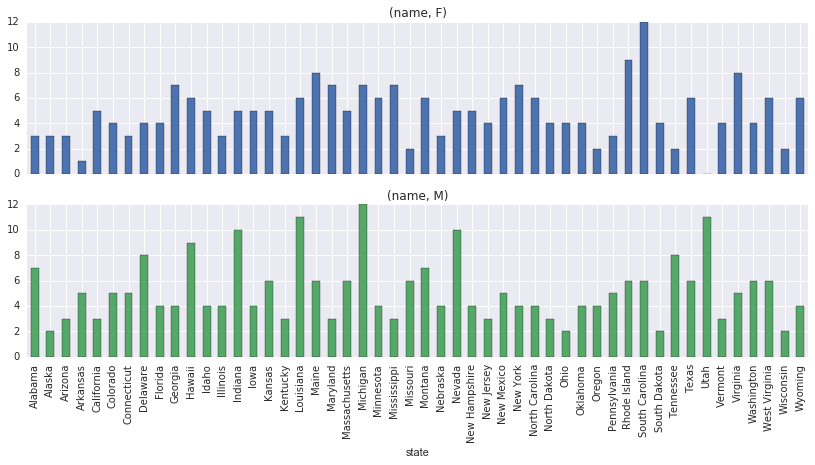

In [27]:
g = df.groupby(by=['state', 'gender']).count()[['name']].unstack(1)
g.plot(kind='bar', subplots=True, legend=False, figsize=(14,6));

Here is an interactive map showing the number of observations per state. We see that the top five most common states in the data set are Michigan, South Carolina, Louisiana, Nevada and Rhode Island.

In [28]:
count_by_state = df.state.value_counts()
count_by_state.to_csv("count_by_state.csv")

Create interactive web-map using [Carto](https://carto.com/).

In [30]:
import IPython
url = "https://willgeary.carto.com/builder/16922e92-2a15-11e7-9f14-0ecd1babdde5/embed"
iframe = '<iframe src=' + url + ' width=100% height=800></iframe>'
IPython.display.HTML(iframe)

# Part 2 - Web Scrape

*To Do: Write a script to scrape a sample site and output its data in JSON.*

*[edgar](http://data-interview.enigmalabs.org/companies/) is a company listings site containing ten pages of company links. Each link endpoint holds company-specific data such as name, description and address. The sole requirement of this part of the test is to produce JSON of all of the company listings data for the site.*

*Please attach a "solution.json" file of the parsed company listings data along with your solution code in your reply!*

In [31]:
from BeautifulSoup import BeautifulSoup
import json
import urllib2
import re
import pandas as pd

First, let's get a list of all the companies listed on the site.

In [32]:
base = "http://data-interview.enigmalabs.org/companies/"
page = "?page={}"

# store companies in a list
companies = []

for page_number in range(1,11):
    
    # Construct url query
    url_query = base + page.format(page_number)
    
    # Read url and scrape it with BeautifulSoup
    url = urllib2.urlopen(url_query)
    content = url.read()
    soup = BeautifulSoup(content)

    # find all elements starting with 'a' and id = some number 
    for item in soup.findAll('a', id=re.compile(r"\d+$")):
        href = item.get('href')
        company = re.sub("/companies/", "", href)
        companies.append(company)

In [33]:
print len(companies), "companies have been scraped."

100 companies have been scraped.


Next, let's go to each company's individual profile to get the data.

In [34]:
# store results as a list of dictionaries
results = []

# parse data for each company
for company in companies:
    
    company_replace_spaces = re.sub(" ", "%20", company)
    company_url = base + company_replace_spaces
    
    url = urllib2.urlopen(company_url)
    content = url.read()
    soup = BeautifulSoup(content)
    
    company_name = str(soup.findAll('td', id='name')[0].contents[0])
    street_address = str(soup.findAll('td', id='street_address')[0].contents[0])
    street_address_2 = str(soup.findAll('td', id='street_address_2')[0].contents[0])
    city = str(soup.findAll('td', id='city')[0].contents[0])
    state = str(soup.findAll('td', id='state')[0].contents[0])
    zipcode = str(soup.findAll('td', id='zipcode')[0].contents[0])
    phone_number = str(soup.findAll('td', id='phone_number')[0].contents[0])
    website = str(soup.findAll('td', id='website')[0].contents[0])
    description = str(soup.findAll('td', id='description')[0].contents[0])
    
    result = {
        'company_name': company_name,
        'street_address': street_address,
        'street_address_2': street_address_2,
        'city': city,
        'state': state,
        'zipcode': zipcode,
        'phone_number': phone_number,
        'website': website,
        'description': description
    }
    
    results.append(result)

Here is a preview of the dataframe of the results:

In [35]:
pd.DataFrame(results).head()

,city,company_name,description,phone_number,state,street_address,street_address_2,website,zipcode
0,Aleasebury,"Douglas, Walsh and Luettgen",harness scalable interfaces,006-152-4393,Mississippi,0630 Annalise Rue Apt. 686,Apt. 221,hettinger.com,39516
1,South Raetown,"Stehr, Beahan and Spencer",leverage customized eyeballs,(959)326-7147x005,Georgia,604 Irine Via Apt. 032,Suite 096,shieldsledner.info,46391
2,Lake Garrison,Torphy-Larkin,incubate wireless bandwidth,418-431-6723x928,Texas,821 Weston Streets Suite 725,Suite 753,reynolds.org,70350
3,Port Lunaburgh,Ryan and Sons,facilitate intuitive bandwidth,193-181-8500,Connecticut,2489 Kuvalis Pine Suite 331,Apt. 624,skiles.net,71359
4,South Fayetteside,"Kulas, White and Weimann",scale seamless e-business,(067)591-1928,Indiana,00827 Thiel Center,Apt. 298,haley.com,25740


Save results to json:

In [36]:
with open("solution.json", 'w') as f:
    json.dump(results, f)